In [3]:
import sys
sys.path.insert(0, 'basic_codes')

import class_magnesium_not_drop_na #_transform_pairings
from class_magnesium_not_drop_na import *
import xgboost

In [4]:
fold = '/home/narsiya_da/'
file_train = 'train.csv'
file_test = 'test.csv'

In [5]:
import importlib
importlib.reload(class_magnesium_not_drop_na)
from class_magnesium_not_drop_na import *

In [6]:
'''
    Класс Magnesium загружает данные из файла file_, находящегося в папке fold. Делает dropna (чтобы кас не ругался)
    model - модель, с которой вы хотите работатьб по умолчанию RFC
    Сохраняет переменные:
    data - загруженный DataFrame
    features - признаки
    groups - цепочки
    x - данные для бучения в виде Numpy-матрицы
    y - целевой признак
'''
m = Magnesium(file_train, fold = fold, model = None)   # Можно написать любую свою модель

Everything is OK. Ready for your experiments!

/home/narsiya_da/anaconda3/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


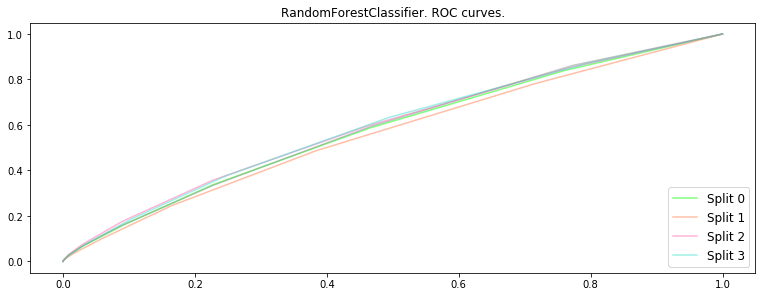

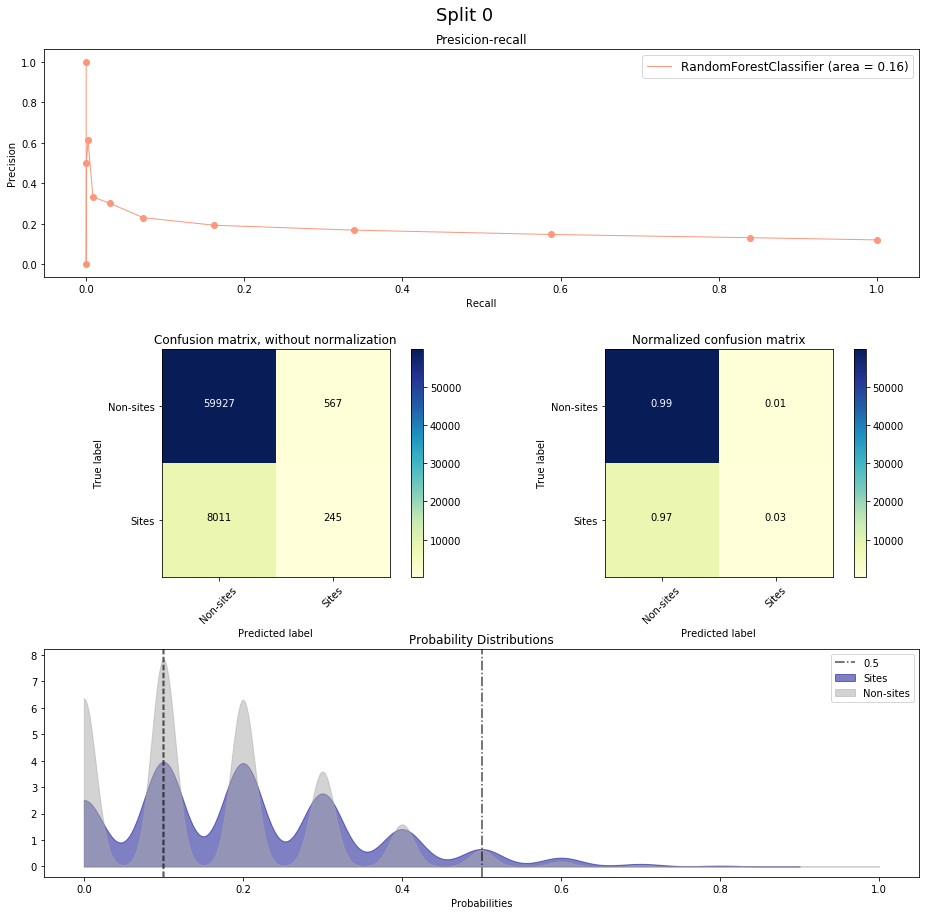

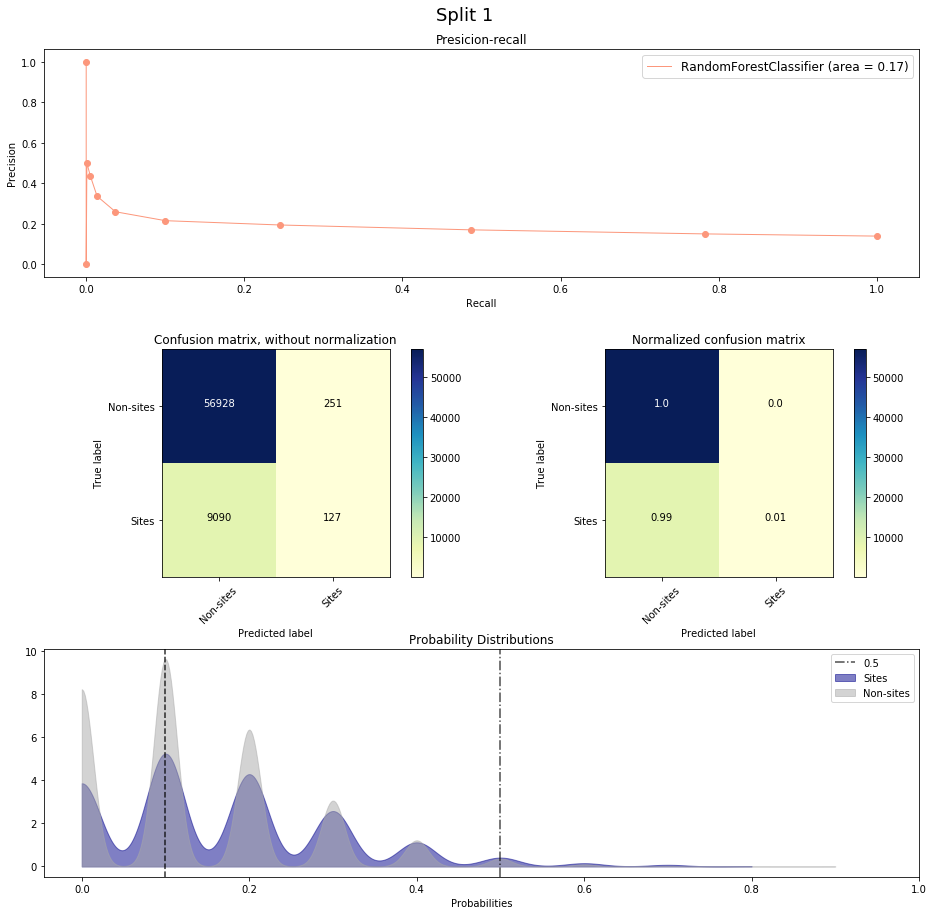

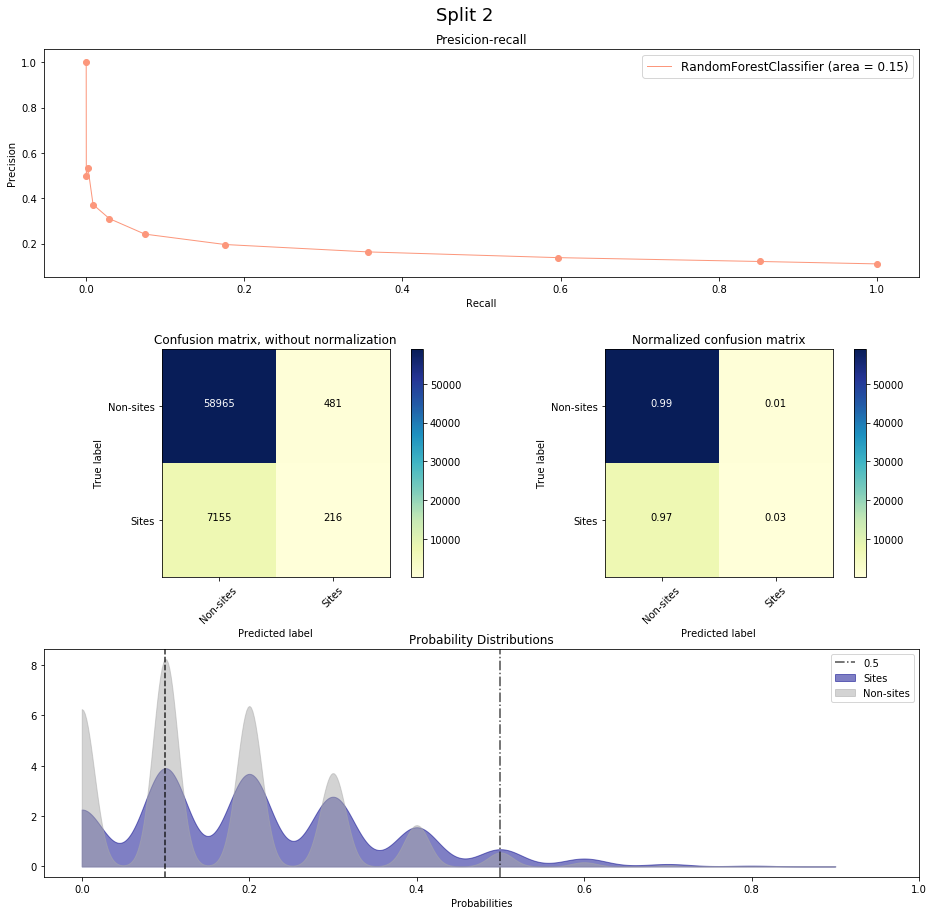

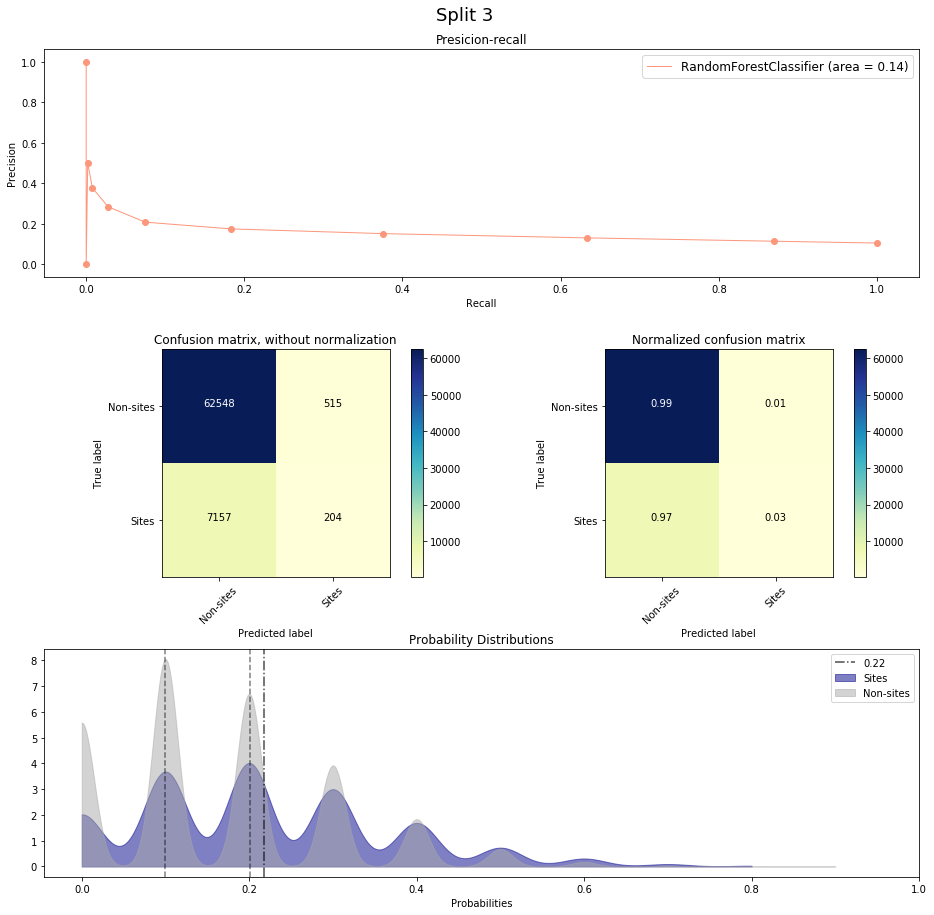

In [7]:
# P.s. эта ячейка порождает много графиков, чтобы не пришлось их скроллить Cell -> Current Outputs -> Toggle Scrolling
'''
  fit_predict осуществляет кроссвалидацию по следуюещему пайплайну:
            если with_groups = True делит выборку с помощью GroupShuffleSplit,
            если False - StratifiedShuffleSplit. 
            C биологической точки зрения логичнее делать разбиения с учетом групп, 
            так как группами являются цепочки => хорошо иметь данные всей цепочки в трейне.
  n_splits, test_size - параметры, окторые передаются GroupShuffleSplit или StratifiedShuffleSplit
  model - можете написать любую свою модель, по дефолту будет брать ту, которая была заложена при создании класса.
  plots - рисовать графики (ROC-AUC, precision-recall, confusion matrix, probability-densities) или нет
  plot_splits - для каких разбиений рисовать графики (разиения нумеруются с 0). По дефолту рисуется для последнего разюиения.
  x , y  - при желании можете подставить свои данные для кросс валидации. По дефолту берет загруженную выборку.
  
  Возвращает словарь с ключами:
  'test score', 'train score' - f1_score на всех сплитах
  'roc_auc': данные функции sklearn.metrics.roc_curve(y_test, y_prob)
  'prec_rec':[precision, recall, average_precision_score, prec_recall_plot]
  'confusion': [cnf_matrix, cnf_normed, cnf_plot, cnf_normed_plot] (normed - означает нормированная матрица)
  'plots':{'roc_auc', 'prec_recall', 'cnf_normed', 'cnf', 'prob_density'}
'''
data = {}
data = m.fit_predict(n_splits = 5, plot_splits = [0, 1, 2, 3])

In [8]:
from tqdm import tqdm
max_mean = 0
max_mean_num = 0
for num in tqdm([100, 200, 300, 400, 500, 800, 1000, 1200, 1500, 1800, 2000]):
    data = {}
    model = xgboost.XGBClassifier(n_estimators=num, scale_pos_weight=5, random_state=42, n_jobs=-1)
    data = m.fit_predict(n_splits = 3, model=model, plots = False)
    cur_mean = np.array(data['test score']).mean()
    print("Current score: {}, with rn_estimators={}".format(cur_mean, num))
    if cur_mean > max_mean:
        max_mean = cur_mean
        max_mean_num = num
print("Best score: {}, with num_estimators={}".format(max_mean, max_mean_num))

  9%|▉         | 1/11 [01:17<12:55, 77.56s/it]


Current score: 0.11491228795911068, with rn_estimators=100


 18%|█▊        | 2/11 [03:38<14:28, 96.46s/it]


Current score: 0.14912255473164507, with rn_estimators=200


 27%|██▋       | 3/11 [07:03<17:12, 129.05s/it]


Current score: 0.16918112477783004, with rn_estimators=300


 36%|███▋      | 4/11 [11:32<19:58, 171.17s/it]


Current score: 0.1817510704203784, with rn_estimators=400


 45%|████▌     | 5/11 [17:05<21:58, 219.75s/it]


Current score: 0.19093119488985177, with rn_estimators=500


 55%|█████▍    | 6/11 [25:51<25:57, 311.54s/it]


Current score: 0.19719070286095747, with rn_estimators=800


 64%|██████▎   | 7/11 [36:40<27:31, 412.82s/it]


Current score: 0.20187988244327487, with rn_estimators=1000


 73%|███████▎  | 8/11 [49:40<26:08, 522.99s/it]


Current score: 0.20555534346733542, with rn_estimators=1200


 82%|████████▏ | 9/11 [1:05:51<21:54, 657.27s/it]


Current score: 0.2082742869895225, with rn_estimators=1500


 91%|█████████ | 10/11 [1:25:18<13:30, 810.12s/it]


Current score: 0.21033673931450841, with rn_estimators=1800


100%|██████████| 11/11 [1:46:48<00:00, 954.15s/it]


Current score: 0.21200780443511522, with rn_estimators=2000
Best score: 0.21200780443511522, with num_estimators=2000


In [9]:
ratio = np.bincount(m.y)[0] / np.bincount(m.y)[1]
print(ratio)

6.369751454257007


In [13]:
from tqdm import tqdm
max_mean = 0
max_mean_rate = 0
for rate in tqdm([0.01, 0.02, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]):
    data = {}
    model = xgboost.XGBClassifier(n_estimators=700, learning_rate=rate, scale_pos_weight=ratio, random_state=42, n_jobs=-1)
    data = m.fit_predict(n_splits = 3, model=model, plots = False);
    cur_mean = np.array(data['test score']).mean()
    print("Current score: {}, with rate={}".format(cur_mean, rate))
    if cur_mean > max_mean:
        max_mean = cur_mean
        max_mean_rate = rate
print("Best score: {}, with rate={}".format(max_mean, max_mean_rate))




  0%|          | 0/12 [00:00<?, ?it/s]


  8%|▊         | 1/12 [07:39<1:24:19, 459.92s/it]

Current score: 0.21573256123997292, with rate=0.01





 17%|█▋        | 2/12 [15:18<1:16:35, 459.50s/it]

Current score: 0.21778164228695673, with rate=0.02





 25%|██▌       | 3/12 [22:56<1:08:52, 459.20s/it]

Current score: 0.22001854722731298, with rate=0.05





 33%|███▎      | 4/12 [30:34<1:01:09, 458.67s/it]

Current score: 0.22176133704252463, with rate=0.1





 42%|████▏     | 5/12 [38:10<53:25, 457.94s/it]  

Current score: 0.22293767757068442, with rate=0.2





 50%|█████     | 6/12 [45:46<45:43, 457.27s/it]

Current score: 0.2237794782805569, with rate=0.3





 58%|█████▊    | 7/12 [53:23<38:05, 457.14s/it]

Current score: 0.22426304638082123, with rate=0.4





 67%|██████▋   | 8/12 [1:00:58<30:26, 456.60s/it]

Current score: 0.224445339771639, with rate=0.5





 75%|███████▌  | 9/12 [1:08:34<22:49, 456.46s/it]

Current score: 0.2247063315508663, with rate=0.6





 83%|████████▎ | 10/12 [1:16:09<15:12, 456.10s/it]

Current score: 0.22497249804679054, with rate=0.7





 92%|█████████▏| 11/12 [1:23:44<07:35, 455.79s/it]

Current score: 0.2250134558266945, with rate=0.8





100%|██████████| 12/12 [1:31:21<00:00, 455.99s/it]




Current score: 0.22526316149041462, with rate=0.9
Best score: 0.22526316149041462, with rate=0.9


In [16]:
%%time
model = xgboost.XGBClassifier(n_estimators=3000, learning_rate=0.05, scale_pos_weight=6.3, random_state=42)
model.fit(m.x, m.y)

CPU times: user 1h 25min 26s, sys: 1.45 s, total: 1h 25min 27s
Wall time: 1h 25min 27s


In [17]:
def load_data(filename):
    '''
        Функция для загрузки датасета без инициализации класса. 
        
        Возвращает:
         data - полный DataFrame
         fetures - список признаков для обучения/предсказания
         x - датасет для тренировки/предсказания в формате np.array
         y - целевой признак, если он есть. В случае с тестовым датасетом возвращает None
    '''
    
    data = pd.read_table(filename, sep=',').dropna()    
    
    data = data[~(data['chainlen']>1000)]

    if ('DSSR' in data.columns):
        data.drop('DSSR', axis=1, inplace=True)    
    
    features = list(deepcopy(data.columns))
    [features.remove(column) for column in ['Id','index', 'pdb_chain', 'mg'] if column in data.columns];
    x_test = np.array(data[features])
    
    try:
        y_test = np.array(data['mg'])
    except: 
        y_test = None
    change_output('Data loaded')
    return {'data':data, 'features':features, 'x':x_test, 'y':y_test}

In [18]:
test = load_data(fold+file_test)

Data loaded

In [19]:
predict_test =  m.predict(x = test['x'], 
                          y = test['y'],
                          model=model,
                          plots = False)
df = pd.DataFrame(data=predict_test['prediction'], columns=['mg'])
df.to_csv(path_or_buf='sub.csv', sep=',', index=True)
#нужно дописать 'Id' в первой строке файла

In [ ]:
'''
First: model = xgboost.XGBClassifier(n_estimators=1500, learning_rate=0.7, scale_pos_weight=5, random_state=42)

Score public: 0.33158
Score private: 0.42400

Second: model = xgboost.XGBClassifier(n_estimators=2000, learning_rate=0.1, scale_pos_weight=5, random_state=42)

Score public: 0.37278
Score private: 0.28936

Third: model = xgboost.XGBClassifier(n_estimators=2000, learning_rate=0.1, scale_pos_weight=6.3, random_state=42)

Score public: 0.36465
Score private: 0.41860

Fourth: model = xgboost.XGBClassifier(n_estimators=1500, learning_rate=0.1, scale_pos_weight=6.3, random_state=42)

Score public: 0.37756
Score private: 0.41791

Fifth: model = xgboost.XGBClassifier(n_estimators=3000, learning_rate=0.05, scale_pos_weight=6.3, random_state=42)

Score public: 0.36995
Score private: 0.37241
'''

In [21]:
best_model = xgboost.XGBClassifier(n_estimators=1500, learning_rate=0.1, scale_pos_weight=6.3, random_state=42)